In [ ]:
import cv2
import pylab as plt

In [ ]:
# нужно если colab использует исключительно мощности компьютера
# на котором запускается проект

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


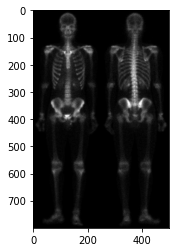

In [ ]:
# этап 1 вывести картинку

import glob
img = cv2.imread('/content/drive/MyDrive/University/Computer Vision/lab4/skeleton.jpg')
plt.imshow(img)

In [ ]:
import numpy as np

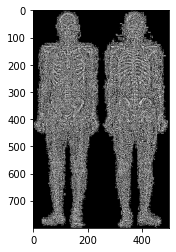

In [ ]:
# этап 2 лапласиан

laplacian = cv2.Laplacian(img,cv2.CV_16S,3)
plt.imshow(laplacian.astype('uint8'))

In [ ]:
# нормализация

normalized_image_laplassian = laplacian.copy()
Imax = np.max(normalized_image_laplassian)
Imin = np.min(normalized_image_laplassian)
Omin, Omax = 0, 255
a = float(Omax - Omin) / (Imax - Imin)
b = Omin - a * Imin
normalized_image_laplassian = a * normalized_image_laplassian + b
normalized_image_laplassian = normalized_image_laplassian.astype(np.uint8)

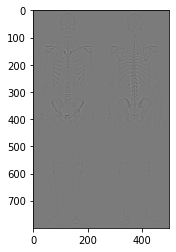

In [ ]:
plt.imshow(normalized_image_laplassian.astype('uint8'))

In [ ]:
additionImgLaplacian = img + laplacian

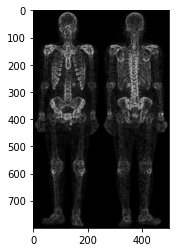

In [ ]:
# этап 3-4 собель (улучшение выступающих краев, сложение плюс собель)

sobelX = cv2.Sobel(img,cv2.CV_16S,1,0,ksize=3)
sobelY = cv2.Sobel(img,cv2.CV_16S,0,1,ksize=3) 
sobel = np.absolute(sobelX) + np.absolute(sobelY)
plt.imshow(sobel.astype('uint8'))

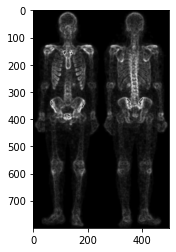

In [ ]:
# этап 5 сглаживание (Сглаживание градиента усредняющим фильтром 5х5)

blurred = cv2.blur(sobel, (5, 5))
plt.imshow(blurred.astype('uint8'))

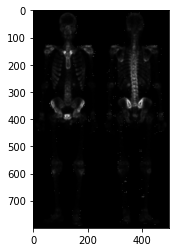

In [ ]:
# этап 6 умножение (Перемножение изображений 3 и 5 (с повышенной резкостью и сглаженного))

mult = cv2.multiply(additionImgLaplacian, blurred / 255, dtype=cv2.CV_16S)
plt.imshow(mult.astype('uint8'))

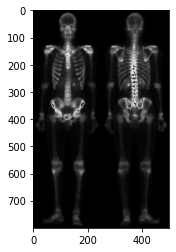

In [ ]:
# добавление (Повышение резкости сложением изображений 1 и 6)

additionImgMult = img + mult
plt.imshow(additionImgMult.astype('uint8'))